## Load dataset
Vietnamese Vehicle Resgistration Certificate dataset

local_path: /home/hung/Downloads/Data OCR/dkx_sau_normalize

drive_path: https://drive.google.com/drive/folders/1YZAx6D_OuxEYPI9Mq9A1k-gv_1cih5FS?usp=drive_link

### Class names ordered by data index
ADDRESS
BRAND
CAPACITY
CHASSIS_NUM
CHASSIS_NUM2
COLOR
ENGINE_NUM
ENGINE_NUM_2
FIRST_ISSUE_DATE
MODEL_CODE
OWNER_NAME
PLATE
SIT

In [1]:
img_path = '/home/hung/Downloads/Data OCR/dkx_sau_normalize/images/train/114_0.jpg'
label_path = '/home/hung/Downloads/Data OCR/dkx_sau_normalize/labels/train/114_0.txt' # yolo format
img_size = 640
import cv2
import matplotlib.pyplot as plt

def yolo_to_coco(yolo_labels, image_size=640):
    x_center, y_center, bbox_width, bbox_height = yolo_labels
    # Denormalize coordinates to match the resized image
    x_center = int(x_center * image_size)
    y_center = int(y_center * image_size)
    bbox_width = int(bbox_width * image_size)
    bbox_height = int(bbox_height * image_size)
    
    # Calculate the top-left and bottom-right coordinates
    x_min = int(x_center - bbox_width / 2)
    y_min = int(y_center - bbox_height / 2)
    x_max = int(x_center + bbox_width / 2)
    y_max = int(y_center + bbox_height / 2)
    return [x_min, y_min, x_max, y_max]

def visualize_yolo_annotations(image_path, txt_file_path):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Resize image to 640x640
    height, width = image.shape[:2]
    resized_image = cv2.resize(image, (640, 640))
    
    # Read the YOLO annotation file
    with open(txt_file_path, 'r') as f:
        annotations = f.readlines()

    # Visualize each bounding box and label
    for annotation in annotations:
        class_id, x_center, y_center, bbox_width, bbox_height = map(float, annotation.split())
        
        # Denormalize coordinates to match the resized image
        x_min, y_min, x_max, y_max = yolo_to_coco((x_center, y_center, bbox_width, bbox_height), image_size=640)
        if class_id == 4 or class_id == 7:
            print(txt_file_path)
        
        # Merge boxes of 12 and 13
        if class_id == 12:
            for annotation in annotations:
                class_id2, x_center2, y_center2, bbox_width2, bbox_height2 = map(float, annotation.split())
                if class_id2 == 13:
                    x_min2, y_min2, x_max2, y_max2 = yolo_to_coco((x_center2, y_center2, bbox_width2, bbox_height2), image_size=640)
                    x_min = int(min(x_min, x_min2))
                    y_min = int(min(y_min, y_min2))
                    x_max = int(max(x_max, x_max2))
                    y_max = int(max(y_max, y_max2))
        if class_id == 13:
            continue
        
        # Draw the bounding box and class label
        cv2.rectangle(resized_image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
        cv2.putText(resized_image, f'{int(class_id)}', (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    
    # Display the image with bounding boxes and labels

    plt.figure(figsize=(8, 8))
    plt.imshow(resized_image)
    plt.axis('off')
    plt.show()

# visualize_yolo_annotations(img_path, label_path)

In [2]:
import os

def visualize_k_images(image_folder, annotation_folder, k):
    # List all image files in the image folder
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg') or f.endswith('.png')]
    
    # Sort the image files to ensure order
    image_files.sort()
    
    # Loop through the first k images and corresponding annotation files
    for i, image_file in enumerate(image_files[:k]):
        # Get the corresponding annotation file (same name, different extension)
        annotation_file = os.path.splitext(image_file)[0] + '.txt'
        annotation_path = os.path.join(annotation_folder, annotation_file)
        image_path = os.path.join(image_folder, image_file)
        
        # Check if annotation file exists
        if os.path.exists(annotation_path):
            visualize_yolo_annotations(image_path, annotation_path)
        else:
            print(f"Annotation file not found for {image_file}")
        
        # Stop if k images are visualized
        if i + 1 >= k:
            break

# visualize_k_images('/home/hung/Downloads/Data OCR/dkx_sau_normalize/images/train', '/home/hung/Downloads/Data OCR/dkx_sau_normalize/labels/train', 700)

In [3]:
import unicodedata

def remove_accent(text):
    text = text.replace('Đ', 'D').replace('đ', 'd')

    # Normalize the string to decompose accented characters into base characters and diacritical marks
    text = unicodedata.normalize('NFD', text)
    # Filter out diacritical marks (characters with Unicode category Mn)
    text = ''.join(char for char in text if unicodedata.category(char) != 'Mn')
    return text

# Ví dụ sử dụng
text = """aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \n\t"""
remove_accent(text)


'aAaAaAaAaAaAaAaAaAaAaAaAaAaAaAaAaAaAbBcCdDdDeEeEeEeEeEeEeEeEeEeEeEeEfFgGhHiIiIiIiIiIiIjJkKlLmMnNoOoOoOoOoOoOoOoOoOoOoOoOoOoOoOoOoOoOpPqQrRsStTuUuUuUuUuUuUuUuUuUuUuUuUvVwWxXyYyYyYyYyYyYzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \n\t'

In [4]:
from datasets import Dataset, DatasetDict, Sequence, Features, ClassLabel, Value, Image
import json, os
from pathlib import Path
ALL_LABELS = ["address", "brand", "capacity", "chassis_1", "chassis_2", "color", "engine_1", "engine_2", "first_issue_date", "model", "name", "plate", "sit_1", "sit_2"]
# ALL_LABELS = ALL_LABELS[:7] 
# my_dict = {"a": Sequence([1, 2, 3])}
features = Features({
    'id': Value(dtype='string', id=None),
    'tokens': Sequence(Value(dtype='string', id=None)),
    'bboxes': Sequence(Sequence(Value(dtype='int64', id=None))),
    'ner_tags': Sequence(ClassLabel(names=ALL_LABELS)),
    'image': Image(mode=None, decode=True),
})

image_folder = "/home/hung/Downloads/dkx_sau_normalize/images"
image_paths = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith('.jpg') or f.endswith('.png')]
train_ratio = 0.8
def split_train_test(data, ratio):
    import random
    # Shuffle the data to ensure randomness
    random.shuffle(data)
    
    # Calculate the split index
    train_size = int(len(data) * ratio)
    
    # Split the data
    train_set = data[:train_size]
    test_set = data[train_size:]
    
    return train_set, test_set
train_image_paths, test_image_paths = split_train_test(image_paths, train_ratio)

def preprocess_label(label):
    if label == "chassis":
        return "chassis_1"
    if label == "engine":
        return "engine_1"
    if label == "sit":
        return "sit_1"
    return label

def create_set(image_paths):
    my_dict = {
        "id": [],
        "tokens": [],
        "bboxes": [],
        "ner_tags": [],
        "image": []
    }

    for image_path in image_paths:
        label_path = Path(image_path).parent.parent / "labels" / (Path(image_path).stem + ".json")
        label_data = json.load(open(label_path))
        # add = True
        # for i in label_data:
            # if preprocess_label(i['label']) not in ALL_LABELS:
            #     print(preprocess_label(i['label']), label_path)
        #         add = False
            # if i['text'] == "":
            #     print(i['text'], label_path)
            #     add = False

        # if add:
        my_dict["id"].append(Path(image_path).stem)
        my_dict["image"].append(image_path)
        tokens, bboxes, ner_tags = [], [], []
        for i in label_data:
            if preprocess_label(i['label']) in ALL_LABELS and i['text'] != "" and len(i['bndbox']) != 0:
                # tokens.append(remove_accent(i['text']))
                tokens.append(i['text'])
                bboxes.append(i['bndbox'])
                ner_tags.append(preprocess_label(i['label']))
            else:
                print(preprocess_label(i['label']), label_path)

        my_dict["tokens"].append(tokens)
        my_dict["bboxes"].append(bboxes)
        my_dict["ner_tags"].append(ner_tags)

    return Dataset.from_dict(my_dict, features=features)



dataset_train = create_set(train_image_paths)
dataset_test = create_set(test_image_paths)
dataset = DatasetDict({"train": dataset_train, "test": dataset_test})
dataset["train"].features

/home/hung/PycharmProjects/foundation-research/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


sit_2 /home/hung/Downloads/dkx_sau_normalize/labels/26caf03b-9cc3-451b-b223-f260420535fd.json
sit_1 /home/hung/Downloads/dkx_sau_normalize/labels/7801fa4f-a68d-488c-b5d0-7262b1d972c4.json
sit_2 /home/hung/Downloads/dkx_sau_normalize/labels/6f774c1a-c1c6-4ba9-884f-fcf2b8749e96.json
sit_2 /home/hung/Downloads/dkx_sau_normalize/labels/6187b988-26e0-40b6-94de-04a95877ed26.json
sit_1 /home/hung/Downloads/dkx_sau_normalize/labels/4468c65a-9aa9-47e8-841d-e3964ef15a34.json
sit_2 /home/hung/Downloads/dkx_sau_normalize/labels/d7646979-74ce-4f17-ad48-31fe79532cd6.json
sit_2 /home/hung/Downloads/dkx_sau_normalize/labels/1d7678db-2e3c-4fcf-92af-68208eb54ca5.json
sit_2 /home/hung/Downloads/dkx_sau_normalize/labels/bedf7fdd-6bff-44c6-8eb8-dfb8c09fbae6.json
sit_2 /home/hung/Downloads/dkx_sau_normalize/labels/d4ce8385-8542-4943-be5e-bbf98ad19efe.json
capacity /home/hung/Downloads/dkx_sau_normalize/labels/f42ce80e-5139-49bf-8920-e11c424289d8.json
sit_2 /home/hung/Downloads/dkx_sau_normalize/labels/e5573

{'id': Value(dtype='string', id=None),
 'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'bboxes': Sequence(feature=Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), length=-1, id=None),
 'ner_tags': Sequence(feature=ClassLabel(names=['address', 'brand', 'capacity', 'chassis_1', 'chassis_2', 'color', 'engine_1', 'engine_2', 'first_issue_date', 'model', 'name', 'plate', 'sit_1', 'sit_2'], id=None), length=-1, id=None),
 'image': Image(mode=None, decode=True, id=None)}

In [5]:
dataset["train"].features

{'id': Value(dtype='string', id=None),
 'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'bboxes': Sequence(feature=Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), length=-1, id=None),
 'ner_tags': Sequence(feature=ClassLabel(names=['address', 'brand', 'capacity', 'chassis_1', 'chassis_2', 'color', 'engine_1', 'engine_2', 'first_issue_date', 'model', 'name', 'plate', 'sit_1', 'sit_2'], id=None), length=-1, id=None),
 'image': Image(mode=None, decode=True, id=None)}

In [6]:
from datasets import load_dataset

# this dataset uses the new Image feature :)
# dataset = load_dataset("nielsr/funsd-layoutlmv3")

As we can see, the dataset consists of 2 splits ("train" and "test"), and each example contains a list of words ("tokens") with corresponding boxes ("bboxes"), and the words are tagged ("ner_tags"). Each example also include the original image ("image").

In [7]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'bboxes', 'ner_tags', 'image'],
        num_rows: 496
    })
    test: Dataset({
        features: ['id', 'tokens', 'bboxes', 'ner_tags', 'image'],
        num_rows: 125
    })
})

Let's check the features:

Note that you can directly see the example in a notebook (as the "image" column is of type [Image](https://huggingface.co/docs/datasets/v2.2.1/en/package_reference/main_classes#datasets.Image)).

B6,KP4 Tân Hiệp,BH: [25, 174, 409, 248], 0
KIA: [252, 242, 342, 307], 1
2199: [831, 294, 992, 358], 2
52A8JC143502: [714, 193, 992, 250], 3
Xanh: [231, 340, 331, 389], 5
D4HBJH282771: [718, 85, 989, 149], 6
18/12/2018: [20, 916, 241, 992], 8
SEDONA: [831, 238, 993, 300], 9
HOÀNG THỊ THANH TÂM 1982: [9, 89, 550, 163], 10
60A-567.61: [9, 680, 415, 806], 11
7: [609, 387, 658, 455], 12
Số chỗ ngồi(Sit):: [427, 372, 614, 436], 13


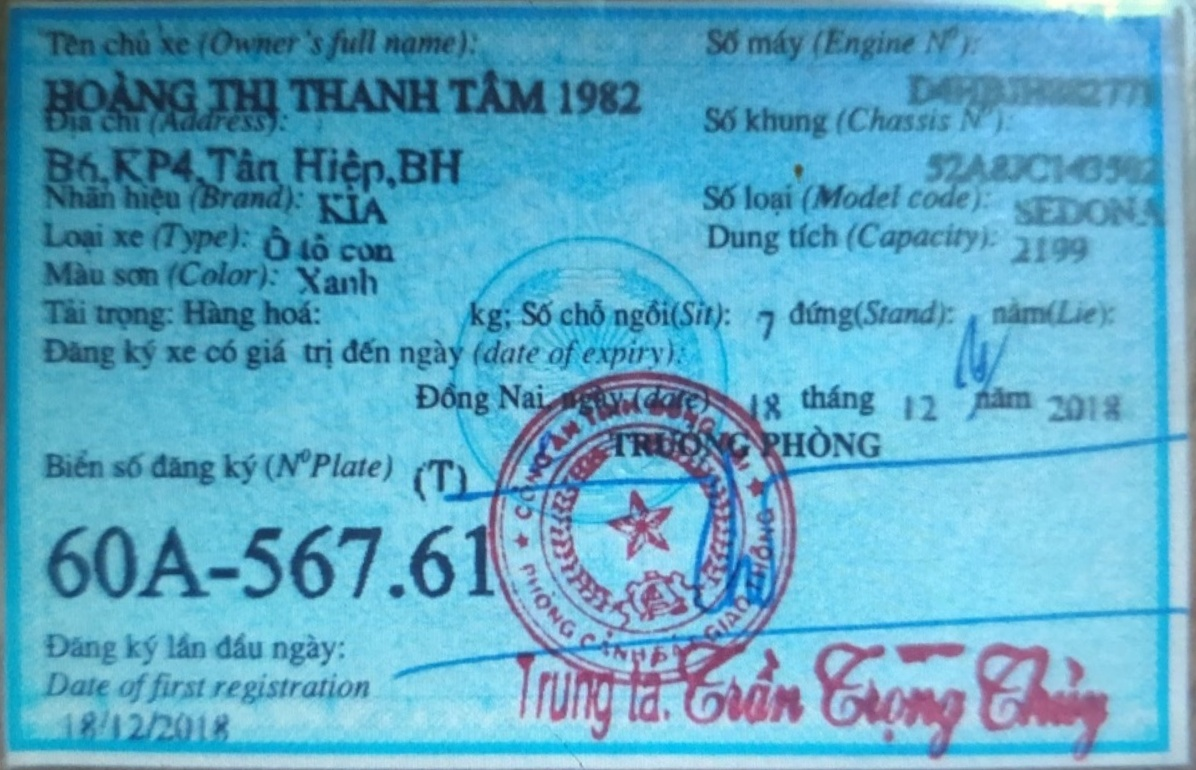

In [8]:
example = dataset["train"][0]
for key, bboxes, ner_tags in zip(example['tokens'], example["bboxes"], example["ner_tags"]):
    print(f"{key}: {bboxes}, {ner_tags}")
example["image"]

## Prepare dataset

Next, we prepare the dataset for the model. This can be done very easily using `LayoutLMv3Processor`, which internally wraps a `LayoutLMv3FeatureExtractor` (for the image modality) and a `LayoutLMv3Tokenizer` (for the text modality) into one.

Basically, the processor does the following internally:
* the feature extractor is used to resize + normalize each document image into `pixel_values`
* the tokenizer is used to turn the words, boxes and NER tags into token-level `input_ids`, `attention_mask` and `labels`.

The processor simply returns a dictionary that contains all these keys.

In [9]:
from transformers import AutoProcessor

# we'll use the Auto API here - it will load LayoutLMv3Processor behind the scenes,
# based on the checkpoint we provide from the hub
processor = AutoProcessor.from_pretrained("microsoft/layoutlmv3-base", apply_ocr=False)

/home/hung/PycharmProjects/foundation-research/venv/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


We'll first create `id2label` and label2id mappings, useful for inference. Note that `LayoutLMv3ForTokenClassification` (the model we'll use later on) will simply output an integer index for a particular class (for each token), so we still need to map it to an actual class name.

In [10]:
from datasets.features import ClassLabel

features = dataset["train"].features
column_names = dataset["train"].column_names
image_column_name = "image"
text_column_name = "tokens"
boxes_column_name = "bboxes"
label_column_name = "ner_tags"

# In the event the labels are not a `Sequence[ClassLabel]`, we will need to go through the dataset to get the
# unique labels.
def get_label_list(labels):
    unique_labels = set()
    for label in labels:
        unique_labels = unique_labels | set(label)
    label_list = list(unique_labels)
    label_list.sort()
    return label_list

if isinstance(features[label_column_name].feature, ClassLabel):
    label_list = features[label_column_name].feature.names
    # No need to convert the labels since they are already ints.
    id2label = {k: v for k,v in enumerate(label_list)}
    label2id = {v: k for k,v in enumerate(label_list)}
else:
    label_list = get_label_list(dataset["train"][label_column_name])
    id2label = {k: v for k,v in enumerate(label_list)}
    label2id = {v: k for k,v in enumerate(label_list)}
num_labels = len(label_list)

In [11]:
print(label_list)

['address', 'brand', 'capacity', 'chassis_1', 'chassis_2', 'color', 'engine_1', 'engine_2', 'first_issue_date', 'model', 'name', 'plate', 'sit_1', 'sit_2']


In [12]:
print(id2label)

{0: 'address', 1: 'brand', 2: 'capacity', 3: 'chassis_1', 4: 'chassis_2', 5: 'color', 6: 'engine_1', 7: 'engine_2', 8: 'first_issue_date', 9: 'model', 10: 'name', 11: 'plate', 12: 'sit_1', 13: 'sit_2'}


Next, we'll define a function which we can apply on the entire dataset.

In [13]:
def prepare_examples(examples):
  images = examples[image_column_name]
  words = examples[text_column_name]
  boxes = examples[boxes_column_name]
  word_labels = examples[label_column_name]

  encoding = processor(images, words, boxes=boxes, word_labels=word_labels,
                       truncation=True, padding="max_length")

  return encoding

In [14]:
from datasets import Features, Sequence, ClassLabel, Value, Array2D, Array3D

# we need to define custom features for `set_format` (used later on) to work properly
features = Features({
    'pixel_values': Array3D(dtype="float32", shape=(3, 224, 224)),
    'input_ids': Sequence(feature=Value(dtype='int64')),
    'attention_mask': Sequence(Value(dtype='int64')),
    'bbox': Array2D(dtype="int64", shape=(512, 4)),
    'labels': Sequence(feature=Value(dtype='int64')),
})

train_dataset = dataset["train"].map(
    prepare_examples,
    batched=True,
    remove_columns=column_names,
    features=features,
)
eval_dataset = dataset["test"].map(
    prepare_examples,
    batched=True,
    remove_columns=column_names,
    features=features,
)

Map: 100%|██████████| 125/125 [00:01<00:00, 75.67 examples/s]


In [15]:
train_dataset

Dataset({
    features: ['pixel_values', 'input_ids', 'attention_mask', 'bbox', 'labels'],
    num_rows: 496
})

In [16]:
example = train_dataset[0]
processor.tokenizer.decode(example["input_ids"])

'<s> B6,KP4 Tân Hiệp,BH KIA 2199 52A8JC143502 Xanh D4HBJH282771 18/12/2018 SEDONA HOÀNG THỊ THANH TÂM 1982 60A-567.61 7 Số chỗ ngồi(Sit):</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad

Next, we set the format to PyTorch.

In [17]:
train_dataset.set_format("torch")

Let's verify that everything was created properly:

In [18]:
import torch

example = train_dataset[0]
for k,v in example.items():
    print(k,v.shape)

pixel_values torch.Size([3, 224, 224])
input_ids torch.Size([512])
attention_mask torch.Size([512])
bbox torch.Size([512, 4])
labels torch.Size([512])


In [19]:
eval_dataset

Dataset({
    features: ['pixel_values', 'input_ids', 'attention_mask', 'bbox', 'labels'],
    num_rows: 125
})

In [20]:
processor.tokenizer.decode(eval_dataset[0]["input_ids"])

'<s> 104 Tổ 59 Khu 6 Hiệp Thành TDM HYUNDAI 998 51ABEM120189 Đỏ G3LAEM139994 02/07/2014 GRAND LÝ KIM PHƯỢNG 1985 61A-173.12 5 Số chỗ ngồi(Sit):</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pa

In [21]:
for id, label in zip(train_dataset[0]["input_ids"], train_dataset[0]["labels"]):
  print(processor.tokenizer.decode([id]), label.item())

<s> -100
 B 0
6 -100
, -100
K -100
P -100
4 -100
 T -100
â -100
n -100
 Hi -100
� -100
� -100
� -100
p -100
, -100
B -100
H -100
 K 1
IA -100
 2 2
199 -100
 52 3
A -100
8 -100
JC -100
14 -100
350 -100
2 -100
 Xan 5
h -100
 D 6
4 -100
HB -100
J -100
H -100
28 -100
27 -100
71 -100
 18 8
/ -100
12 -100
/ -100
2018 -100
 S 9
ED -100
ON -100
A -100
 HO 10
� -100
� -100
NG -100
 TH -100
� -100
� -100
� -100
 TH -100
AN -100
H -100
 T -100
Â -100
M -100
 1982 -100
 60 11
A -100
- -100
5 -100
67 -100
. -100
61 -100
 7 12
 S 13
� -100
� -100
� -100
 ch -100
� -100
� -100
� -100
 ng -100
� -100
� -100
� -100
i -100
( -100
Sit -100
): -100
</s> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<

## Define metrics

Next, we define a `compute_metrics` function, which is used by the Trainer to ... compute metrics.

This function should take a named tuple as input, and return a dictionary as output as stated in the [docs](https://huggingface.co/docs/transformers/main_classes/trainer).

In [22]:
# from datasets import load_metric
import evaluate

metric = evaluate.load("seqeval")

In [23]:
import numpy as np

return_entity_level_metrics = False

def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    # Remove ignored index (special tokens)
    true_predictions = [
        [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = metric.compute(predictions=true_predictions, references=true_labels)
    if return_entity_level_metrics:
        # Unpack nested dictionaries
        final_results = {}
        for key, value in results.items():
            if isinstance(value, dict):
                for n, v in value.items():
                    final_results[f"{key}_{n}"] = v
            else:
                final_results[key] = value
        return final_results
    else:
        return {
            "precision": results["overall_precision"],
            "recall": results["overall_recall"],
            "f1": results["overall_f1"],
            "accuracy": results["overall_accuracy"],
        }

## Define the model

Next we define the model: this is a Transformer encoder with pre-trained weights, and a randomly initialized head on top for token classification.

In [24]:
from transformers import LayoutLMv3ForTokenClassification

model = LayoutLMv3ForTokenClassification.from_pretrained("microsoft/layoutlmv3-base",
                                                         id2label=id2label,
                                                         label2id=label2id)

Some weights of LayoutLMv3ForTokenClassification were not initialized from the model checkpoint at microsoft/layoutlmv3-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Define TrainingArguments + Trainer

Next we define the `TrainingArguments`, which define all hyperparameters related to training. Note that there is a huge amount of parameters to tweak, check the [docs](https://huggingface.co/docs/transformers/main_classes/trainer#transformers.TrainingArguments) for more info.

In [25]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="test",
                                  max_steps=1000,
                                  per_device_train_batch_size=2,
                                  per_device_eval_batch_size=2,
                                  learning_rate=1e-5,
                                  evaluation_strategy="steps",
                                  eval_steps=100,
                                  load_best_model_at_end=True,
                                  metric_for_best_model="f1")

/home/hung/PycharmProjects/foundation-research/venv/lib/python3.10/site-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


We can now instantiate a Trainer, with the model and args defined above. We also provide our datasets, as well as a "default data collator" - which will batch the examples using `torch.stack`. We also provide our `compute_metrics` function defined above.

In [26]:
from transformers.data.data_collator import default_data_collator

# Initialize our Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=processor,
    data_collator=default_data_collator,
    compute_metrics=compute_metrics,
)

max_steps is given, it will override any value given in num_train_epochs


In [27]:
import torch

print(torch.cuda.is_available())

print(torch.cuda.device_count())

print(torch.cuda.current_device())

print(torch.cuda.device(0))

print(torch.cuda.get_device_name(0))

tensor = torch.randn(3, 3)

# Check if CUDA is available, and move tensor to GPU if it is
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move tensor to the selected device
tensor = tensor.to(device)



True
1
0
NVIDIA GeForce RTX 3070 Laptop GPU


## Train the model

Let's train!

In [28]:
trainer.train()

[2024-10-12 22:23:49,774] [INFO] [real_accelerator.py:219:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/usr/bin/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status
/usr/bin/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status
  0%|          | 0/1000 [00:00<?, ?it/s]/home/hung/PycharmProjects/foundation-research/venv/lib/python3.10/site-packages/transformers/modeling_utils.py:1126: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
 10%|█         | 100/1000 [00:27<04:04,  3.67it/s]/home/hung/PycharmProjects/foundation-research/venv/lib/python3.10/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: address seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/home/hung/PycharmProjects/foundation-research/venv/lib/python3.10/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: brand seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/home/hung/PycharmProject

{'eval_loss': 0.553304135799408, 'eval_precision': 0.9506531204644412, 'eval_recall': 0.9297374024130589, 'eval_f1': 0.9400789379260853, 'eval_accuracy': 0.9531357684355617, 'eval_runtime': 8.602, 'eval_samples_per_second': 14.531, 'eval_steps_per_second': 7.324, 'epoch': 0.4}


                                                  
 20%|██        | 200/1000 [01:11<03:40,  3.63it/s]

{'eval_loss': 0.12384898215532303, 'eval_precision': 0.9835479256080114, 'eval_recall': 0.9758694109297374, 'eval_f1': 0.9796936230851443, 'eval_accuracy': 0.9841488628532047, 'eval_runtime': 8.3826, 'eval_samples_per_second': 14.912, 'eval_steps_per_second': 7.516, 'epoch': 0.81}


                                                  
 30%|███       | 300/1000 [01:47<03:12,  3.63it/s]

{'eval_loss': 0.056037820875644684, 'eval_precision': 0.992181947405828, 'eval_recall': 0.9907735982966643, 'eval_f1': 0.9914772727272727, 'eval_accuracy': 0.9924190213645762, 'eval_runtime': 8.3843, 'eval_samples_per_second': 14.909, 'eval_steps_per_second': 7.514, 'epoch': 1.21}


                                                  
 40%|████      | 400/1000 [02:23<02:46,  3.61it/s]

{'eval_loss': 0.039114661514759064, 'eval_precision': 0.9943181818181818, 'eval_recall': 0.99361249112846, 'eval_f1': 0.9939652112176074, 'eval_accuracy': 0.994486560992419, 'eval_runtime': 8.5069, 'eval_samples_per_second': 14.694, 'eval_steps_per_second': 7.406, 'epoch': 1.61}


 50%|█████     | 500/1000 [02:51<02:19,  3.59it/s]

{'loss': 0.4584, 'grad_norm': 0.16901372373104095, 'learning_rate': 5e-06, 'epoch': 2.02}


                                                  
 50%|█████     | 500/1000 [03:00<02:19,  3.59it/s]

{'eval_loss': 0.03465445712208748, 'eval_precision': 0.9957386363636364, 'eval_recall': 0.9950319375443577, 'eval_f1': 0.9953851615193469, 'eval_accuracy': 0.9958649207443143, 'eval_runtime': 8.6388, 'eval_samples_per_second': 14.47, 'eval_steps_per_second': 7.293, 'epoch': 2.02}


/home/hung/PycharmProjects/foundation-research/venv/lib/python3.10/site-packages/transformers/modeling_utils.py:1126: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
 60%|██████    | 600/1000 [03:30<01:51,  3.59it/s]/home/hung/PycharmProjects/foundation-research/venv/lib/python3.10/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: address seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/home/hung/PycharmProjects/foundation-research/venv/lib/python3.10/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: brand seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/home/hung/PycharmProjects/foundation-research/venv/lib/python3.10/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: capacity seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/home/hung/PycharmProjects/foundation-

{'eval_loss': 0.034475620836019516, 'eval_precision': 0.9950248756218906, 'eval_recall': 0.99361249112846, 'eval_f1': 0.9943181818181818, 'eval_accuracy': 0.9951757408683667, 'eval_runtime': 8.756, 'eval_samples_per_second': 14.276, 'eval_steps_per_second': 7.195, 'epoch': 2.42}


                                                  
 70%|███████   | 700/1000 [04:16<01:23,  3.59it/s]

{'eval_loss': 0.03304343670606613, 'eval_precision': 0.9950248756218906, 'eval_recall': 0.99361249112846, 'eval_f1': 0.9943181818181818, 'eval_accuracy': 0.9951757408683667, 'eval_runtime': 8.9611, 'eval_samples_per_second': 13.949, 'eval_steps_per_second': 7.03, 'epoch': 2.82}


                                                  
 80%|████████  | 800/1000 [04:53<00:55,  3.59it/s]

{'eval_loss': 0.02760295942425728, 'eval_precision': 0.9950284090909091, 'eval_recall': 0.9943222143364088, 'eval_f1': 0.9946751863684772, 'eval_accuracy': 0.9951757408683667, 'eval_runtime': 9.4026, 'eval_samples_per_second': 13.294, 'eval_steps_per_second': 6.7, 'epoch': 3.23}


                                                  
 90%|█████████ | 900/1000 [05:30<00:27,  3.57it/s]

{'eval_loss': 0.02839139848947525, 'eval_precision': 0.9950248756218906, 'eval_recall': 0.99361249112846, 'eval_f1': 0.9943181818181818, 'eval_accuracy': 0.9951757408683667, 'eval_runtime': 9.0997, 'eval_samples_per_second': 13.737, 'eval_steps_per_second': 6.923, 'epoch': 3.63}


100%|██████████| 1000/1000 [05:58<00:00,  3.57it/s]

{'loss': 0.0408, 'grad_norm': 0.1175459772348404, 'learning_rate': 0.0, 'epoch': 4.03}


                                                   
100%|██████████| 1000/1000 [06:08<00:00,  3.57it/s]

{'eval_loss': 0.02879473753273487, 'eval_precision': 0.9950248756218906, 'eval_recall': 0.99361249112846, 'eval_f1': 0.9943181818181818, 'eval_accuracy': 0.9951757408683667, 'eval_runtime': 9.0947, 'eval_samples_per_second': 13.744, 'eval_steps_per_second': 6.927, 'epoch': 4.03}


100%|██████████| 1000/1000 [06:11<00:00,  2.69it/s]

{'train_runtime': 371.1778, 'train_samples_per_second': 5.388, 'train_steps_per_second': 2.694, 'train_loss': 0.24960567474365233, 'epoch': 4.03}


TrainOutput(global_step=1000, training_loss=0.24960567474365233, metrics={'train_runtime': 371.1778, 'train_samples_per_second': 5.388, 'train_steps_per_second': 2.694, 'total_flos': 530872356864000.0, 'train_loss': 0.24960567474365233, 'epoch': 4.032258064516129})

## Evaluate the model

NOTE: we end up with an F1 score of about 90%. Here's what I got on a typical run:
```
Step	Training Loss	Val Loss	Precision	Recall	F1	Accuracy
100	  No log	  0.716025	0.752040	0.824143	0.786442	0.780459
200	  No log	  0.584986	0.828558	0.876304	0.851762	0.801973
300	  No log	  0.525926	0.859583	0.900149	0.879398	0.833947
400	  No log	  0.492821	0.881413	0.904620	0.892866	0.854630
500	  0.561200	0.528126	0.858382	0.885246	0.871607	0.852490
600	  0.561200	0.547107	0.888023	0.906110	0.896976	0.847973
700	  0.561200	0.555438	0.887338	0.915549	0.901222	0.859384
800	  0.561200	0.582942	0.881471	0.905117	0.893137	0.854749
900	  0.561200	0.599762	0.891051	0.910084	0.900467	0.852015
1000	0.133400	0.608207	0.887222	0.910581	0.898750	0.847855
````

However, this score cannot be directly compared to LayoutLM and LayoutLMv2, as LayoutLMv3 employs so-called **segment position embeddings** (inspired by [StructuralLM](https://arxiv.org/abs/2105.11210)). This means that several tokens that belong to the same "segment" (let's say, an address) get the same bounding box coordinates, and in return the same 2D position embeddings.

This is also mentioned in the paper:
>  Note that LayoutLMv3 and StructuralLM use segment-level layout positions, while the other works use word-level layout positions. The use of segment-level positions may benefit the semantic entity labeling task on FUNSD [25], so the two types of work are not directly comparable.

In [29]:
trainer.evaluate()

/home/hung/PycharmProjects/foundation-research/venv/lib/python3.10/site-packages/transformers/modeling_utils.py:1126: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
 98%|█████████▊| 62/63 [00:08<00:00,  7.53it/s]/home/hung/PycharmProjects/foundation-research/venv/lib/python3.10/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: address seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/home/hung/PycharmProjects/foundation-research/venv/lib/python3.10/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: brand seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/home/hung/PycharmProjects/foundation-research/venv/lib/python3.10/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: capacity seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/home/hung/PycharmProjects/foundation-res

{'eval_loss': 0.03465445712208748,
 'eval_precision': 0.9957386363636364,
 'eval_recall': 0.9950319375443577,
 'eval_f1': 0.9953851615193469,
 'eval_accuracy': 0.9958649207443143,
 'eval_runtime': 8.851,
 'eval_samples_per_second': 14.123,
 'eval_steps_per_second': 7.118,
 'epoch': 4.032258064516129}

## Inference

You can load the model for inference as follows:

In [30]:
from transformers import AutoModelForTokenClassification

model = AutoModelForTokenClassification.from_pretrained("test/checkpoint-1000")

Let's take an example of the training dataset to show inference.

In [31]:
# example = dataset["test"][0]
example = dataset["train"][0]
print(example.keys())

dict_keys(['id', 'tokens', 'bboxes', 'ner_tags', 'image'])


We first prepare it for the model using the processor.

In [32]:
image = example["image"]
words = example["tokens"]
boxes = example["bboxes"]
word_labels = example["ner_tags"]

encoding = processor(image, words, boxes=boxes, word_labels=word_labels, return_tensors="pt")
for k,v in encoding.items():
  print(k,v.shape)

input_ids torch.Size([1, 88])
attention_mask torch.Size([1, 88])
bbox torch.Size([1, 88, 4])
labels torch.Size([1, 88])
pixel_values torch.Size([1, 3, 224, 224])


Next, we do a forward pass. We use torch.no_grad() as we don't require gradient computation.

In [33]:
with torch.no_grad():
  outputs = model(**encoding)

The model outputs logits of shape (batch_size, seq_len, num_labels).

In [34]:
logits = outputs.logits
logits.shape

torch.Size([1, 88, 14])

We take the highest score for each token, using argmax. This serves as the predicted label for each token.

In [35]:
predictions = logits.argmax(-1).squeeze().tolist()
print(predictions)

[9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 9]


Let's compare this to the ground truth: note that many labels are -100, as we're only labeling the first subword token of each word.

NOTE: at "true inference" time, you don't have access to labels, see the latest section of this notebook how you can use `offset_mapping` in that case.

In [36]:
labels = encoding.labels.squeeze().tolist()
print(labels)

[-100, 0, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, 1, -100, 2, -100, 3, -100, -100, -100, -100, -100, -100, 5, -100, 6, -100, -100, -100, -100, -100, -100, -100, 8, -100, -100, -100, -100, 9, -100, -100, -100, 10, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, 11, -100, -100, -100, -100, -100, -100, 12, 13, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100]


So let's only compare predictions and labels at positions where the label isn't -100. We also want to have the bounding boxes of these (unnormalized):

In [37]:
def unnormalize_box(bbox, width, height):
     return [
         width * (bbox[0] / 1000),
         height * (bbox[1] / 1000),
         width * (bbox[2] / 1000),
         height * (bbox[3] / 1000),
     ]

token_boxes = encoding.bbox.squeeze().tolist()
width, height = image.size

true_predictions = [model.config.id2label[pred] for pred, label in zip(predictions, labels) if label != - 100]
true_labels = [model.config.id2label[label] for prediction, label in zip(predictions, labels) if label != -100]
true_boxes = [unnormalize_box(box, width, height) for box, label in zip(token_boxes, labels) if label != -100]

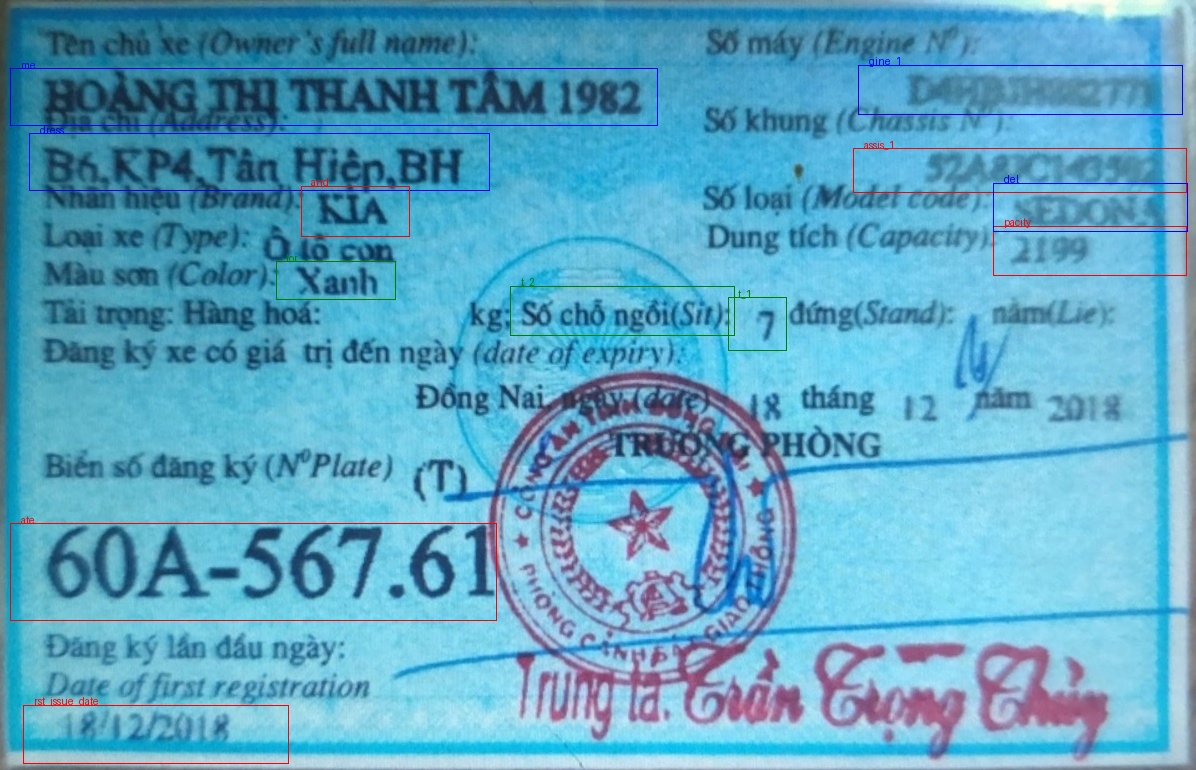

In [38]:
from PIL import ImageDraw, ImageFont

draw = ImageDraw.Draw(image)

font = ImageFont.load_default()

def iob_to_label(label):
    label = label[2:]
    if not label:
      return 'other'
    return label

def label2color(label):
  if "a" in label:
    return "red"
  if "e" in label:
    return "blue"
  else:
    return "green"
# label2color = {'question':'blue', 'answer':'green', 'header':'orange', 'other':'violet'}

for prediction, box in zip(true_predictions, true_boxes):
    predicted_label = prediction.lower()
    draw.rectangle(box, outline=label2color(predicted_label))
    draw.text((box[0] + 10, box[1] - 10), text=predicted_label, fill=label2color(predicted_label), font=font)

image

Compare this to the ground truth:

address
brand
capacity
chassis_1
color
engine_1
first_issue_date
model
name
plate
sit_1
sit_2


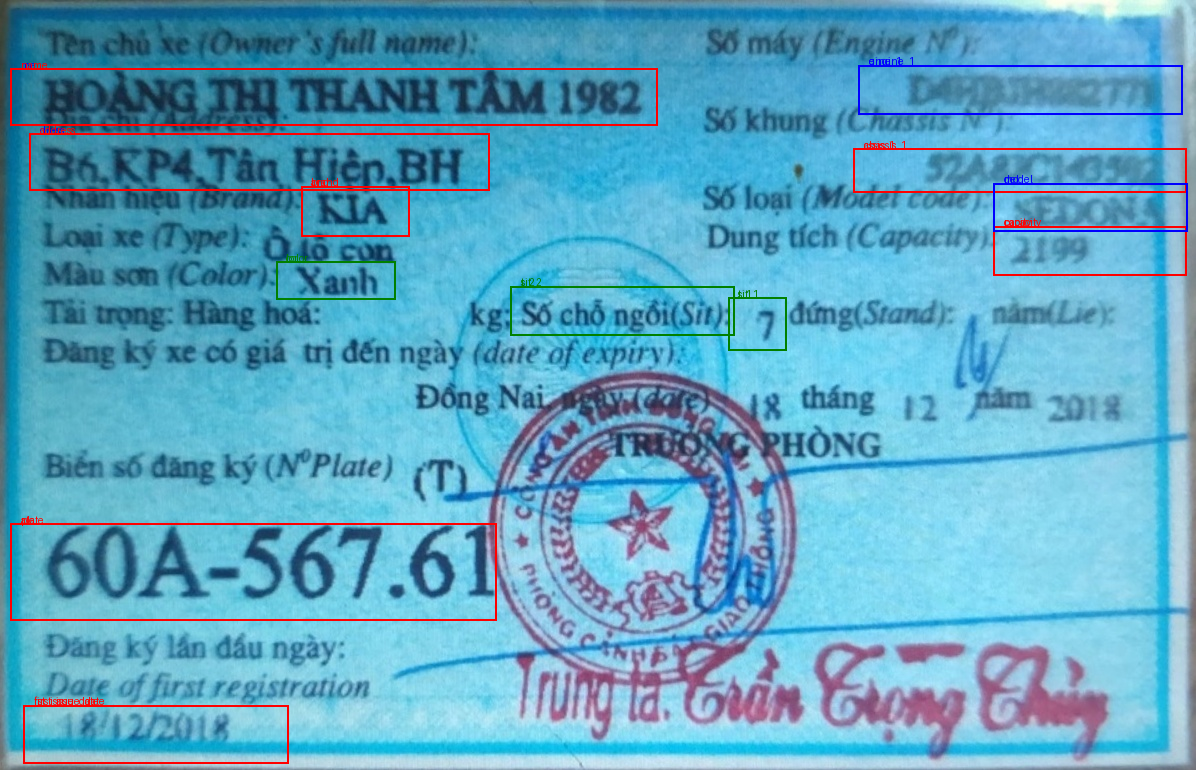

In [39]:
from PIL import ImageDraw, ImageFont
image = example["image"]
image = image.convert("RGB")
width, height = image.size

draw = ImageDraw.Draw(image)

for word, box, label in zip(example['tokens'], example['bboxes'], example['ner_tags']):
  actual_label = id2label[label]
  box = unnormalize_box(box, width, height)
  print(actual_label)
  draw.rectangle(box, outline=label2color(actual_label), width=2)
  draw.text((box[0] + 10, box[1] - 10), actual_label, fill=label2color(actual_label), font=font)

image

## Note: inference when you don't have labels

The code above used the `labels` to determine which tokens were at the start of a particular word or not. Of course, at inference time, you don't have access to any labels. In that case, you can leverage the `offset_mapping` returned by the tokenizer. I do have a notebook for that (for LayoutLMv2, but it's equivalent for LayoutLMv3) [here](https://github.com/NielsRogge/Transformers-Tutorials/blob/master/LayoutLMv2/FUNSD/True_inference_with_LayoutLMv2ForTokenClassification_%2B_Gradio_demo.ipynb).